<a href="https://colab.research.google.com/github/gouzylla/British-airlines-analysis/blob/main/british_airways_rating_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
page=requests.get(base_url)

In [30]:
soup=BeautifulSoup(page.content,'html.parser')
#print(soup.prettify)

In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []
ratings = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    for param in parsed_content.find_all("div", {"class": "rating-10"}):
        ratings.append(param.get_text())
    if i==1:
          ratings.pop(0)
    else:
        ratings.pop((i-1)*page_size)


    
    
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [5]:
df = pd.DataFrame()
df["reviews"] = reviews
df["ratings"] = ratings


In [6]:
df['reviews']=df['reviews'].str.replace('✅ Trip Verified |', '')
df['reviews']=df['reviews'].str.replace('Not Verified', '')
df['reviews']=df['reviews'].str.replace('|', '')

<ipython-input-6-22c953bca78a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews']=df['reviews'].str.replace('✅ Trip Verified |', '')
<ipython-input-6-22c953bca78a>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['reviews']=df['reviews'].str.replace('|', '')


In [7]:
df['ratings']=df['ratings'].str.replace('\n', '')
df['ratings']=df['ratings'].str.replace('/10', '')

In [8]:
df.head(5)


,reviews,ratings
0,Boarding at Mumbai was chaotic and badly orga...,9
1,"Mexico City Airport is a zoo, but taking the...",10
2,"Very poor service, very frustrating. Firstly...",1
3,"Generally poor. Sent to gate on time, sat m...",3
4,BA changed our prepaid seats at the last mi...,1


In [13]:
#df.to_csv("E:/Data/British_airways/BA_reviews.csv")

In [11]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 84.8 MB/s eta 0:00:00


In [12]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [14]:
sentiment=df['reviews'].tolist()

In [15]:
analysis = sentiment_pipeline(sentiment, padding=True, truncation=True)

In [16]:
res = [label['label'] for label in analysis ]

In [17]:
df['sentiment']=res

In [18]:
df.head()

,reviews,ratings,sentiment
0,Boarding at Mumbai was chaotic and badly orga...,9,POSITIVE
1,"Mexico City Airport is a zoo, but taking the...",10,NEGATIVE
2,"Very poor service, very frustrating. Firstly...",1,NEGATIVE
3,"Generally poor. Sent to gate on time, sat m...",3,NEGATIVE
4,BA changed our prepaid seats at the last mi...,1,NEGATIVE


In [19]:
df['sentiment'].value_counts()

NEGATIVE    713
POSITIVE    287
Name: sentiment, dtype: int64

In [20]:
df['ratings'].value_counts()

1     311
2     112
10    104
3      99
8      81
9      80
7      61
4      59
5      51
6      42
Name: ratings, dtype: int64

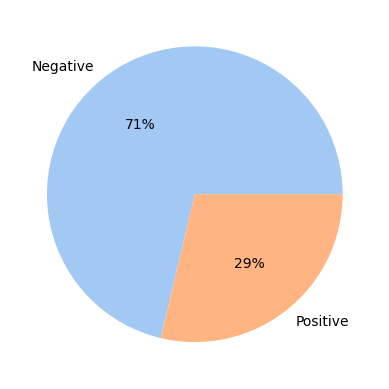

In [21]:

#define data
data = [df['sentiment'].value_counts()["NEGATIVE"], df['sentiment'].value_counts()["POSITIVE"]]
labels = ['Negative', 'Positive']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

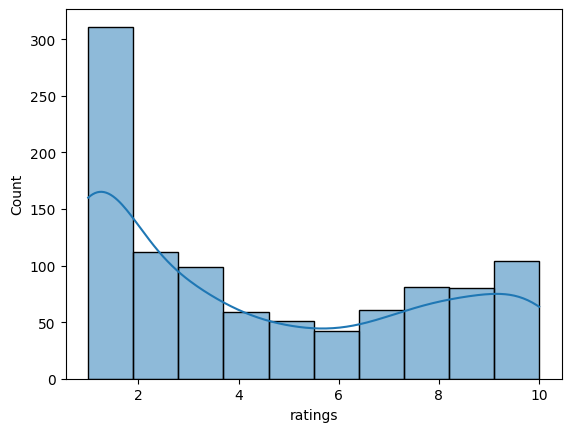

In [24]:
df['ratings'] = df['ratings'].astype('int')
df_ratings = df.sort_values(['ratings']).reset_index(drop=True)
sns.histplot(data=df_ratings, x="ratings", kde=True, bins=10);

            

In [25]:
df.ratings.mean()

4.41

In [26]:
df_neg = df[(df.sentiment == "NEGATIVE")]
df_pos = df[(df.sentiment == "POSITIVE")]

In [28]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


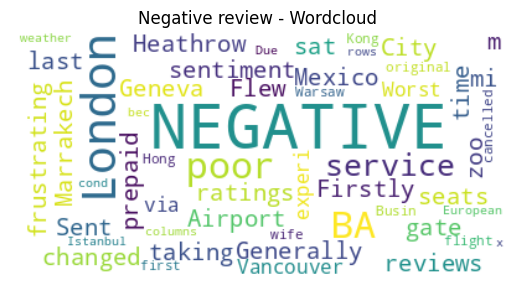

In [27]:
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator

stop_words = list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(df_neg))
plt.figure()
plt.title("Negative review - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

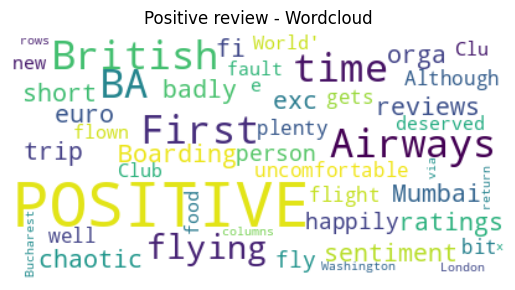

In [29]:
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator

stop_words = list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(df_pos))
plt.figure()
plt.title("Positive review - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()